### 1. Data Acquisition & Exploratory Data Analysis (EDA)

In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned heart disease dataset
# This file was created after preprocessing the original UCI dataset
df = pd.read_csv("../data/processed/heart_cleaned.csv")

# Display first few rows to understand the structure of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


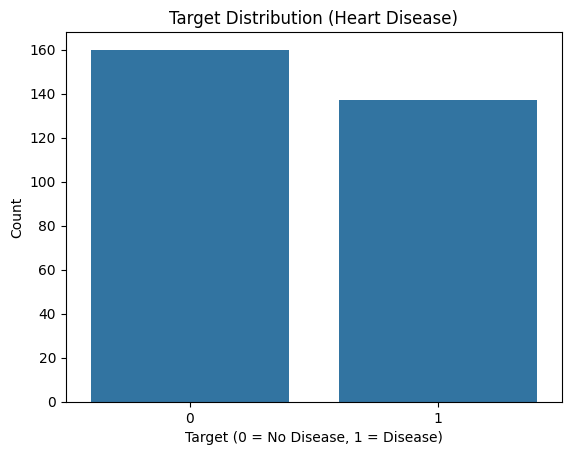

In [3]:
# Visualize the distribution of the target variable
# 0 = No heart disease
# 1 = Presence of heart disease

sns.countplot(x="target", data=df)
plt.title("Target Distribution (Heart Disease)")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

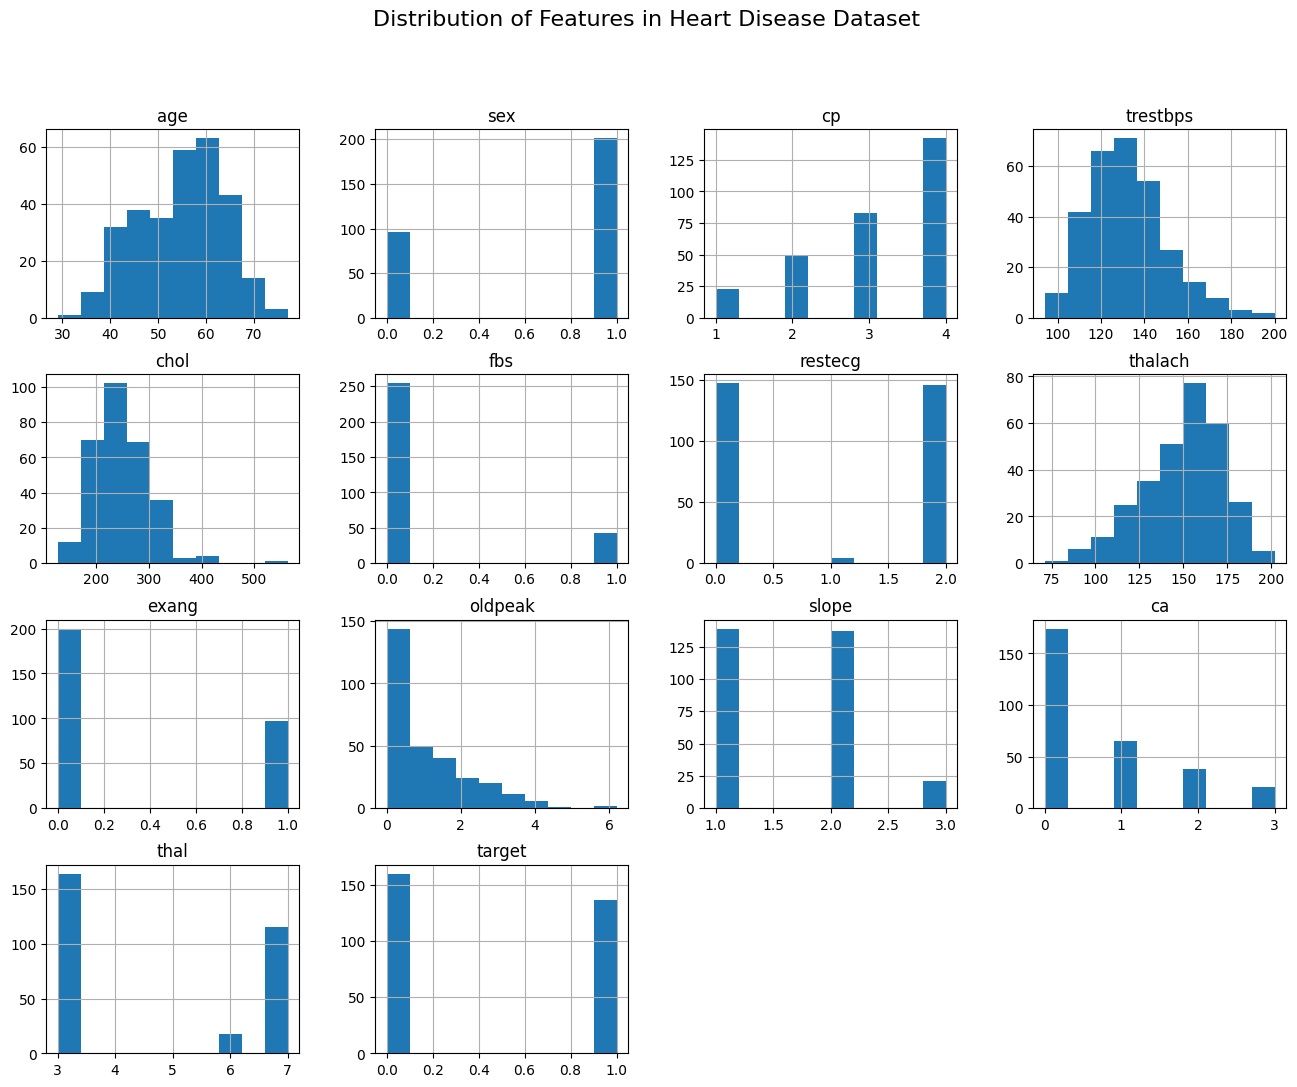

In [4]:
# Plot histograms for all numerical features
# This helps understand the spread and range of values

df.hist(figsize=(16, 12))
plt.suptitle("Distribution of Features in Heart Disease Dataset", fontsize=16)
plt.show()

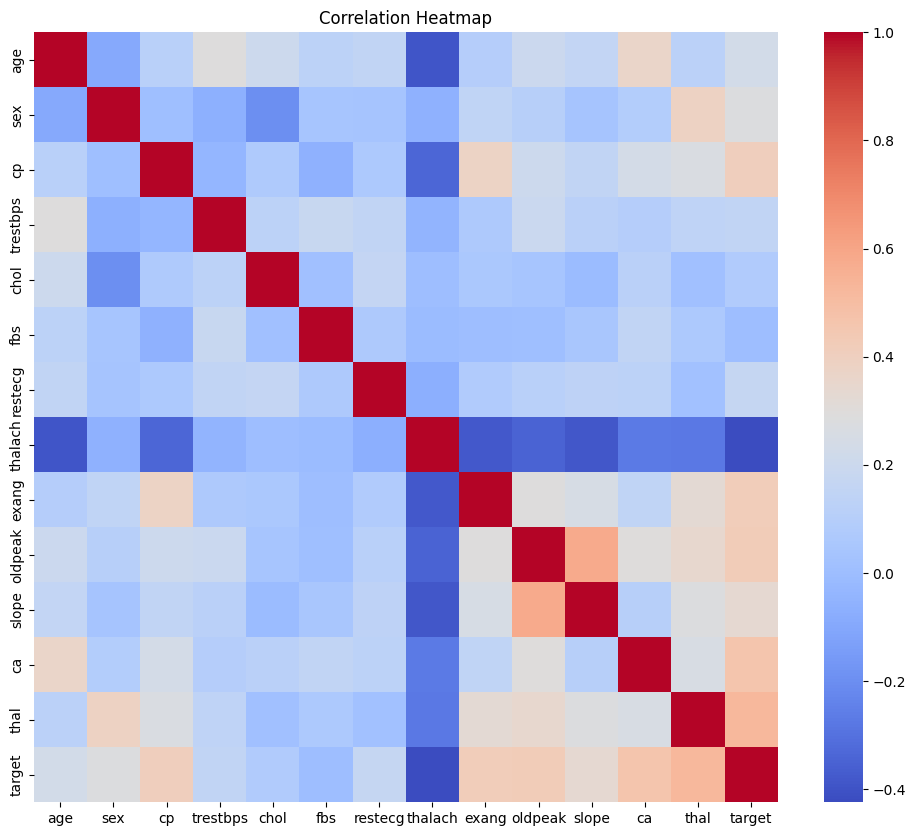

In [5]:
# correlation heatmap to analyze relationships
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Save the correlation heatmap image
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("../screenshots/correlation_heatmap.png")
plt.close()

### EDA Observations

- The dataset consists of clinical and demographic features related to heart health.
- The target variable is reasonably balanced, which is suitable for classification tasks.
- Features such as age, chest pain type (cp), maximum heart rate (thalach),
  and exercise-induced angina (exang) show noticeable correlation with heart disease.
- After preprocessing, no missing values are present in the dataset.

### 2. Feature Engineering & Model Development

In this project, feature engineering and model development were implemented using modular Python scripts to ensure reproducibility and  production readiness, instead of performing all steps directly inside the notebook.

#### Feature Engineering
- The UCI Heart Disease dataset contains only numerical features after preprocessing.
- Numerical features were scaled using `StandardScaler` to bring them to a common range.
- Feature preprocessing was implemented using `ColumnTransformer` and `Pipeline`  to ensure the same transformations are consistently applied during training and evaluation.

#### Model Development
The following classification models were trained and compared:
- **Logistic Regression**
- **Random Forest Classifier**

These models were chosen to compare a linear baseline model with a non-linear ensemble model.

#### Model Evaluation
- Model performance was evaluated using **5-fold cross-validation**.
- The following evaluation metrics were used:
  - Accuracy
  - Precision
  - Recall
  - ROC-AUC

Cross-validation helps assess how well the models generalize to unseen data.

> Note: The complete implementation for feature engineering, training, and evaluation
  is available in `src/features.py` and `src/train.py`.
